## **Tesla Sales Data Analysis**

##Introduction

This sales data analytics project aims to uncover patterns and trends in the car company's sales data to enhance performance. By analyzing sales across various regions, products, and time periods, we can identify top-selling products, high-performing regions, and the most profitable time frames. These insights will help optimize sales strategies and drive revenue growth.

##Data Sourcing

The dataset used for this analysis was created in python. The dataset contains information on cars sold by the company, including the car model, version, country, customer purchase type, car price sales, and gross profit.

In [363]:
# @title
!pip3 install Faker

In [364]:
import pandas as pd
import numpy as np
from faker import Faker
import random
import datetime

# Set a fixed seed for reproducibility
SEED =1226
random.seed(SEED)
np.random.seed(SEED)
fake = Faker()
fake.seed_instance(SEED)  # Seed Faker

# Define sample data for categorical fields
car_brands = ["Tesla"]
car_models = {
    "Tesla": ["Model S", "Model 3", "Model X", "Model Y", "CyberTruck"]
}
colors = ["Black", "White", "Silver", "Red", "Blue", "Gray"]
regions = ["North America", "Europe", "Asia", "Australia"]
payment_types = ["Cash", "Credit Card", "Financing", "Lease"]
purchase_methods = ["Online", "In-person"]
discounts = [0, 500, 1000, 2000, 3000]  # Sample discount values

# Generate 1,000 rows of seed data
num_records = 1000
data = []
start_date = datetime.date(2022, 1, 1)
end_date = datetime.date(2024, 12, 31)

for i in range(num_records):
    transaction_id = f"TXN{i+1:05d}"
    date = fake.date_between(start_date=start_date, end_date=end_date)
    time = fake.time_object()
    invoice_number = f"INV{i+1:05d}"
    sales_rep_id = f"SR{random.randint(100, 999)}"

    brand = random.choice(car_brands)
    model = random.choice(car_models[brand])
    color = random.choice(colors)
    model_year = random.randint(2022, 2024)

    unit_price = random.randint(45000, 100000)
    discount_applied = random.choice(discounts)
    final_price = unit_price - discount_applied
    total_revenue = final_price  # Assuming one unit sold per transaction

    customer_id = f"CUST{random.randint(1000, 9999)}"
    customer_name = fake.name()
    age = random.randint(18, 75)
    gender = random.choice(["Male", "Female"])
    customer_type = random.choice(["New", "Returning"])
    purchase_method = random.choice(purchase_methods)
    payment_type = random.choice(payment_types)

    store_id = f"STORE{random.randint(1, 20)}"
    store_location = fake.city()
    region = random.choice(regions)
    sales_channel = random.choice(["Online", "Showroom"])

    data.append([
        transaction_id, date, time, invoice_number, sales_rep_id, brand, model,
        color, model_year, unit_price, discount_applied, final_price,
        total_revenue, customer_id, customer_name, age, gender, customer_type,
        purchase_method, payment_type, store_id, store_location, region, sales_channel
    ])

# Create a DataFrame
columns = [
    "Transaction_ID", "Date", "Time", "Invoice_Number", "Sales_Rep_ID", "Brand",
    "Product_Name", "Color", "Model_Year", "Unit_Price", "Discount_Applied",
    "Final_Price", "Total_Revenue", "Customer_ID", "Customer_Name", "Age", "Gender",
    "Customer_Type", "Purchase_Method", "Payment_Type", "Store_ID", "Store_Location",
    "Region", "Sales_Channel"
]

df = pd.DataFrame(data, columns=columns)

# Save to CSV
df.to_csv("car_sales_data.csv", index=False)
print("Synthetic sales data generated and saved to 'car_sales_data.csv'.")



Synthetic sales data generated and saved to 'car_sales_data.csv'.


* **Import necessary libraries**

In [365]:
#Importing Libraries I will use in this project
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


* **Loading the data to Data frame using pandas**

In [366]:
#Data loading using read_csv as my data file is a .csv file.
sales_data = pd.read_csv('car_sales_data.csv')

In [367]:
sales_data.head(10)

,Transaction_ID,Date,Time,Invoice_Number,Sales_Rep_ID,Brand,Product_Name,Color,Model_Year,Unit_Price,...,Customer_Name,Age,Gender,Customer_Type,Purchase_Method,Payment_Type,Store_ID,Store_Location,Region,Sales_Channel
0,TXN00001,2023-05-16,11:44:39.724012,INV00001,SR567,Tesla,Model X,Silver,2023,78646,...,Jose Webb,59,Female,New,In-person,Financing,STORE1,Amandaburgh,Asia,Showroom
1,TXN00002,2022-12-11,18:54:17.737271,INV00002,SR186,Tesla,Model 3,Silver,2023,47577,...,Abigail Ibarra,61,Male,Returning,In-person,Financing,STORE12,Elizabethchester,Asia,Online
2,TXN00003,2022-04-03,10:00:32.581855,INV00003,SR611,Tesla,Model S,Blue,2022,84349,...,Zachary Walsh,73,Male,New,In-person,Cash,STORE13,Lake Donnaberg,Australia,Online
3,TXN00004,2024-07-01,07:58:34.733701,INV00004,SR880,Tesla,Model S,Red,2022,90009,...,Jennifer Rose,70,Female,Returning,Online,Lease,STORE6,Nicholasshire,North America,Online
4,TXN00005,2024-09-25,12:28:42.871965,INV00005,SR824,Tesla,CyberTruck,Red,2022,65488,...,Andrew Sanders,74,Female,New,In-person,Credit Card,STORE6,Lake Melissa,North America,Online
5,TXN00006,2024-11-25,05:44:56.296111,INV00006,SR396,Tesla,CyberTruck,White,2023,97975,...,James Clark,20,Male,New,Online,Cash,STORE11,North Samanthamouth,North America,Showroom
6,TXN00007,2022-04-07,03:46:29.462201,INV00007,SR185,Tesla,CyberTruck,Black,2023,72308,...,Mrs. Tabitha Cook,68,Female,New,Online,Credit Card,STORE9,Haynesfort,Asia,Online
7,TXN00008,2022-07-20,17:29:24.153200,INV00008,SR139,Tesla,Model 3,Red,2022,96445,...,Lacey Pope,59,Male,New,Online,Lease,STORE18,East Jasmineton,Europe,Showroom
8,TXN00009,2024-02-14,06:30:18.514259,INV00009,SR509,Tesla,Model 3,Red,2024,83281,...,Jonathan Dickerson,23,Male,New,In-person,Credit Card,STORE13,Hutchinsonshire,Australia,Online
9,TXN00010,2022-05-14,09:46:37.826530,INV00010,SR359,Tesla,Model 3,Black,2022,78091,...,Anthony Roberts,32,Male,Returning,Online,Cash,STORE12,West Lindsey,Europe,Online


## **Understanding Data**
 - Let’s  look at the data set shape, number, types of variables, and the overall distribution of the data :

**Using shape, able to identify the size of the data frame which gives in the format of (rows,columns)**

In [368]:
#checking the data shape
sales_data.shape

(1000, 24)

## **Identifying Missing Values and Duplicate Values**

**Finding Number of Null values in data frame**

In [369]:
sales_data.isnull().sum(axis=0)

,0
Transaction_ID,0
Date,0
Time,0
Invoice_Number,0
Sales_Rep_ID,0
Brand,0
Product_Name,0
Color,0
Model_Year,0
Unit_Price,0


In [370]:
sales_data[sales_data.duplicated()]

,Transaction_ID,Date,Time,Invoice_Number,Sales_Rep_ID,Brand,Product_Name,Color,Model_Year,Unit_Price,...,Customer_Name,Age,Gender,Customer_Type,Purchase_Method,Payment_Type,Store_ID,Store_Location,Region,Sales_Channel



- **There are no null and dulipcate rows in the dataset.**


In [371]:
sales_data.describe()

,Model_Year,Unit_Price,Discount_Applied,Final_Price,Total_Revenue,Age
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2022.966000,72801.33300,1283.500000,71517.833000,71517.833000,46.260000
std,0.827967,16153.96875,1096.850414,16218.548318,16218.548318,16.690206
min,2022.000000,45018.00000,0.000000,42543.000000,42543.000000,18.000000
25%,2022.000000,58556.75000,500.000000,57452.000000,57452.000000,31.000000
50%,2023.000000,73729.50000,1000.000000,72498.500000,72498.500000,46.000000
75%,2024.000000,86967.50000,2000.000000,85494.250000,85494.250000,60.000000
max,2024.000000,99989.00000,3000.000000,99989.000000,99989.000000,75.000000


##1. Sales Performance Overview

* **Total sales revenue and units sold over time.**

In [372]:
sales_data['Year'] = pd.to_datetime(sales_data['Date']).dt.year

In [373]:
revenue_data_year = sales_data.groupby('Year')['Total_Revenue'].sum().reset_index()

In [374]:
revenue_data_year['Revenue (Millions)'] = revenue_data_year['Total_Revenue'] / 1000000

In [375]:
# for plotting I am using seaborn library; so will include sns in imports section above

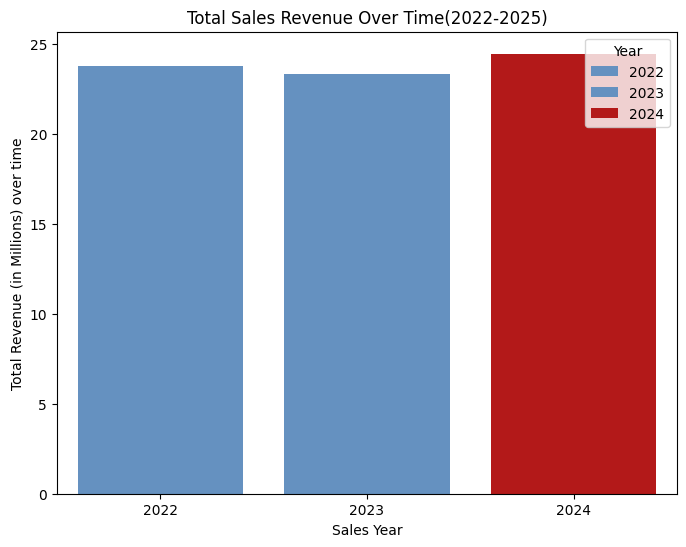

In [376]:
plt.figure(figsize=(8,6))
graph = sns.barplot(data=revenue_data_year, x="Year", y="Revenue (Millions)",hue="Year",errorbar=None,palette=["#5690CF","#5690CF","#cc0000"])
graph.set(title='Total Sales Revenue Over Time(2022-2025)')
plt.xlabel('Sales Year')
plt.ylabel('Total Revenue (in Millions) over time')
plt.show()

-- We see that sales over time has increased since 2022 to 2024.

* **Sales trends (monthly, quarterly, yearly comparisons)**

In [377]:
sales_data['Quarter'] = pd.to_datetime(sales_data['Date']).dt.quarter

In [378]:
sales_data['Month'] = pd.to_datetime(sales_data['Date']).dt.month_name()

In [379]:
sales_data

,Transaction_ID,Date,Time,Invoice_Number,Sales_Rep_ID,Brand,Product_Name,Color,Model_Year,Unit_Price,...,Customer_Type,Purchase_Method,Payment_Type,Store_ID,Store_Location,Region,Sales_Channel,Year,Quarter,Month
0,TXN00001,2023-05-16,11:44:39.724012,INV00001,SR567,Tesla,Model X,Silver,2023,78646,...,New,In-person,Financing,STORE1,Amandaburgh,Asia,Showroom,2023,2,May
1,TXN00002,2022-12-11,18:54:17.737271,INV00002,SR186,Tesla,Model 3,Silver,2023,47577,...,Returning,In-person,Financing,STORE12,Elizabethchester,Asia,Online,2022,4,December
2,TXN00003,2022-04-03,10:00:32.581855,INV00003,SR611,Tesla,Model S,Blue,2022,84349,...,New,In-person,Cash,STORE13,Lake Donnaberg,Australia,Online,2022,2,April
3,TXN00004,2024-07-01,07:58:34.733701,INV00004,SR880,Tesla,Model S,Red,2022,90009,...,Returning,Online,Lease,STORE6,Nicholasshire,North America,Online,2024,3,July
4,TXN00005,2024-09-25,12:28:42.871965,INV00005,SR824,Tesla,CyberTruck,Red,2022,65488,...,New,In-person,Credit Card,STORE6,Lake Melissa,North America,Online,2024,3,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,TXN00996,2024-03-16,14:29:20.976147,INV00996,SR181,Tesla,Model Y,White,2024,53125,...,Returning,Online,Lease,STORE15,Gallowayside,Europe,Showroom,2024,1,March
996,TXN00997,2024-05-27,19:56:02.631764,INV00997,SR101,Tesla,Model S,Black,2024,62637,...,Returning,In-person,Financing,STORE9,Klineview,Asia,Online,2024,2,May
997,TXN00998,2022-03-19,09:54:23.622073,INV00998,SR145,Tesla,Model X,White,2024,80737,...,Returning,In-person,Credit Card,STORE20,South Davidside,Asia,Showroom,2022,1,March
998,TXN00999,2023-11-24,01:41:23.506332,INV00999,SR621,Tesla,Model S,Black,2022,97490,...,Returning,In-person,Credit Card,STORE17,Bradburgh,North America,Online,2023,4,November


In [380]:
# Group data by Month, Quarter, and Year to see the trends
monthly_sales = sales_data.groupby(['Year', 'Month'])['Transaction_ID'].count().reset_index()
quarterly_sales = sales_data.groupby(['Year', 'Quarter'])['Transaction_ID'].count().reset_index()
yearly_sales = sales_data.groupby('Year')['Transaction_ID'].count().reset_index()


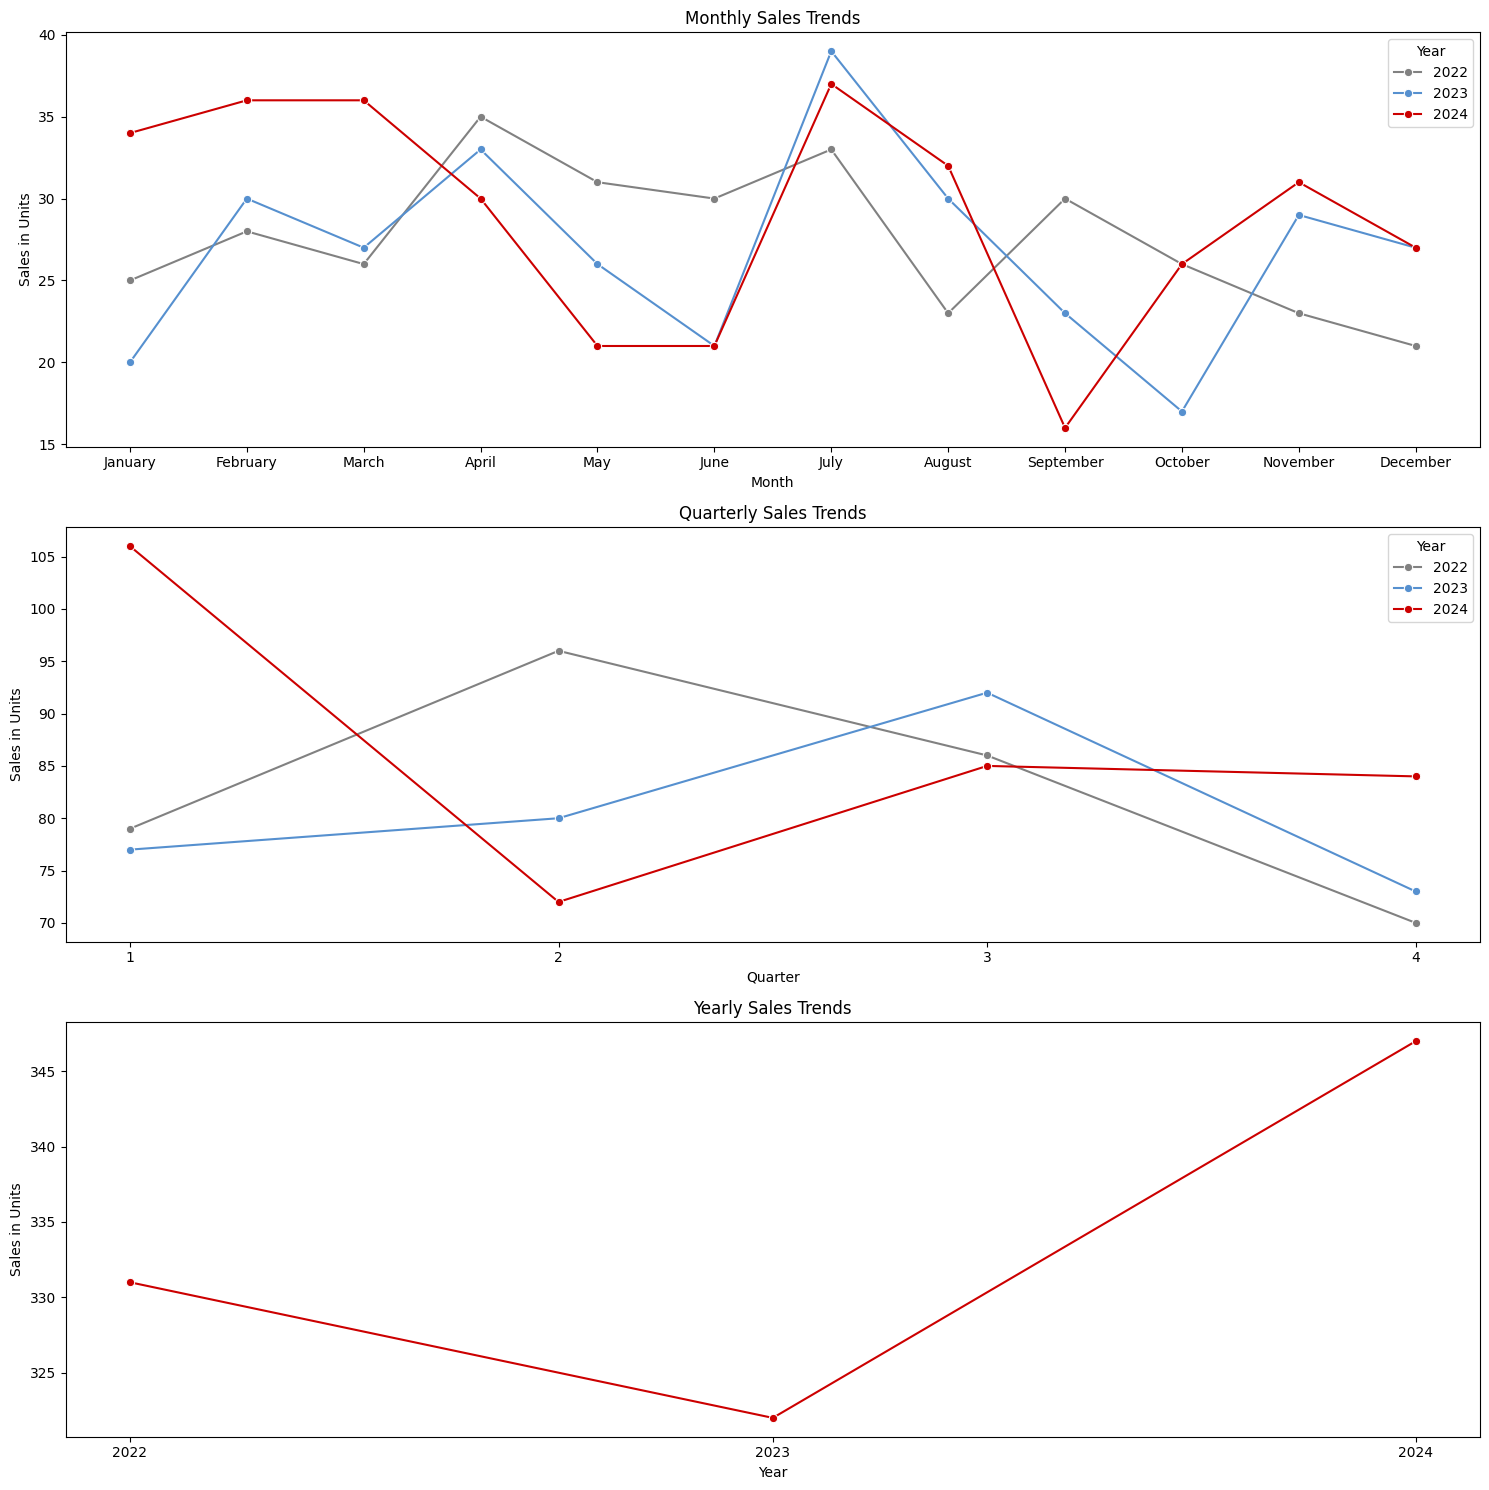

In [381]:
fig, axes = plt.subplots(3, 1, figsize=(15, 15))

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

monthly_sales['Month'] = pd.Categorical(monthly_sales['Month'], categories=month_order, ordered=True)

# Monthly Sales Trend
graph = sns.lineplot(x='Month', y='Transaction_ID', data=monthly_sales,ax=axes[0],hue='Year',marker="o", palette=["#818181","#5690CF","#cc0000"])
axes[0].set_title("Monthly Sales Trends")
axes[0].set_ylabel("Sales in Units")
axes[0].set_xlabel("Month")

quarterly_sales['Quarter'] = quarterly_sales['Quarter'].astype(int)

# Quarterly Sales Trend
sns.lineplot(x='Quarter', y='Transaction_ID', data=quarterly_sales, hue='Year', ax=axes[1],marker="o",palette=["#818181","#5690CF","#cc0000"])
axes[1].set_title("Quarterly Sales Trends")
axes[1].set_ylabel("Sales in Units")
axes[1].set_xlabel("Quarter")
axes[1].set_xticks([1, 2, 3, 4])

# Yearly Sales Trend
sns.lineplot(x='Year', y='Transaction_ID', data=yearly_sales, ax=axes[2],color = "#cc0000",marker="o")
axes[2].set_title("Yearly Sales Trends")
axes[2].set_ylabel("Sales in Units")
axes[2].set_xlabel("Year")
axes[2].set_xticks([2022,2023,2024])

plt.tight_layout()
plt.show()

* **Top-performing products and least-performing products**

In [382]:
product_sales = sales_data.groupby(by=['Year','Product_Name'])['Transaction_ID'].count().reset_index()

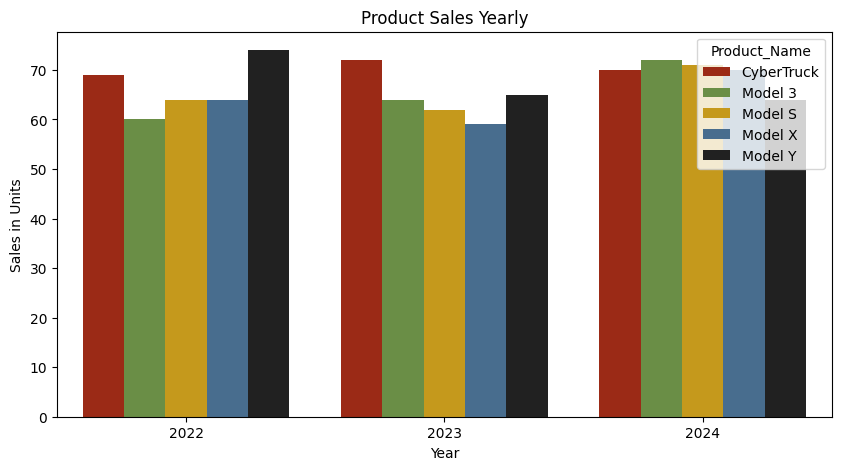

In [383]:
fig, axes = plt.subplots(figsize=(10, 5))


# Top-performing products
top_products = sns.barplot(x='Year', y='Transaction_ID', hue='Product_Name',data=product_sales,ax=axes,palette = ["#B11A00", "#6A9A3A", "#E1A700", "#3C6E9A", "#212121"])
axes.set_title("Product Sales Yearly")
axes.set_xlabel("Year")
axes.set_ylabel("Sales in Units")
plt.show()



##2. Regional Sales Analysis

In [384]:
sales_data.head(10)

,Transaction_ID,Date,Time,Invoice_Number,Sales_Rep_ID,Brand,Product_Name,Color,Model_Year,Unit_Price,...,Customer_Type,Purchase_Method,Payment_Type,Store_ID,Store_Location,Region,Sales_Channel,Year,Quarter,Month
0,TXN00001,2023-05-16,11:44:39.724012,INV00001,SR567,Tesla,Model X,Silver,2023,78646,...,New,In-person,Financing,STORE1,Amandaburgh,Asia,Showroom,2023,2,May
1,TXN00002,2022-12-11,18:54:17.737271,INV00002,SR186,Tesla,Model 3,Silver,2023,47577,...,Returning,In-person,Financing,STORE12,Elizabethchester,Asia,Online,2022,4,December
2,TXN00003,2022-04-03,10:00:32.581855,INV00003,SR611,Tesla,Model S,Blue,2022,84349,...,New,In-person,Cash,STORE13,Lake Donnaberg,Australia,Online,2022,2,April
3,TXN00004,2024-07-01,07:58:34.733701,INV00004,SR880,Tesla,Model S,Red,2022,90009,...,Returning,Online,Lease,STORE6,Nicholasshire,North America,Online,2024,3,July
4,TXN00005,2024-09-25,12:28:42.871965,INV00005,SR824,Tesla,CyberTruck,Red,2022,65488,...,New,In-person,Credit Card,STORE6,Lake Melissa,North America,Online,2024,3,September
5,TXN00006,2024-11-25,05:44:56.296111,INV00006,SR396,Tesla,CyberTruck,White,2023,97975,...,New,Online,Cash,STORE11,North Samanthamouth,North America,Showroom,2024,4,November
6,TXN00007,2022-04-07,03:46:29.462201,INV00007,SR185,Tesla,CyberTruck,Black,2023,72308,...,New,Online,Credit Card,STORE9,Haynesfort,Asia,Online,2022,2,April
7,TXN00008,2022-07-20,17:29:24.153200,INV00008,SR139,Tesla,Model 3,Red,2022,96445,...,New,Online,Lease,STORE18,East Jasmineton,Europe,Showroom,2022,3,July
8,TXN00009,2024-02-14,06:30:18.514259,INV00009,SR509,Tesla,Model 3,Red,2024,83281,...,New,In-person,Credit Card,STORE13,Hutchinsonshire,Australia,Online,2024,1,February
9,TXN00010,2022-05-14,09:46:37.826530,INV00010,SR359,Tesla,Model 3,Black,2022,78091,...,Returning,Online,Cash,STORE12,West Lindsey,Europe,Online,2022,2,May


In [385]:
regions_data = sales_data.groupby(by='Region')['Transaction_ID'].count().reset_index()

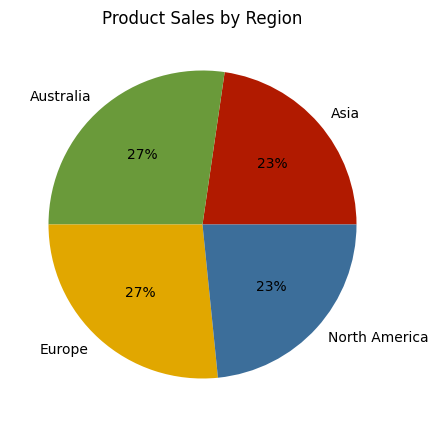

In [386]:
fig, axes = plt.subplots(figsize=(10, 5))
plt.pie(regions_data['Transaction_ID'], labels=regions_data['Region'], colors=["#B11A00", "#6A9A3A", "#E1A700", "#3C6E9A"], autopct='%.0f%%')
axes.set_title("Product Sales by Region")
plt.show()

### We can assume market population and calculate market penetration and measure the effectiveness of sales in regions especially if we have more details in area to know which rural area or urban area to focus and incentive people in that location.

Lets try to check the distribution of Sales for different store locations.
- As I am using Fake data, I dont see any specific high or low sales volumes based on store_location. Not a useful variable to check..

In [387]:
store_data = sales_data.groupby(by=['Region','Store_Location'])['Transaction_ID'].count().reset_index()

In [388]:
store_data.sort_values(by='Transaction_ID',ascending=False)

,Region,Store_Location,Transaction_ID
41,Asia,Emilymouth,3
695,Europe,Russellville,2
890,North America,Nicolefort,2
745,Europe,West Diana,2
708,Europe,South Daniel,2
...,...,...,...
335,Australia,Lake Vincentchester,1
336,Australia,Lake Williammouth,1
337,Australia,Lake Zacharymouth,1
338,Australia,Lambview,1


##3. Product Performance Analysis

In [389]:
product_data = sales_data.groupby(by='Product_Name')['Transaction_ID'].count().reset_index()

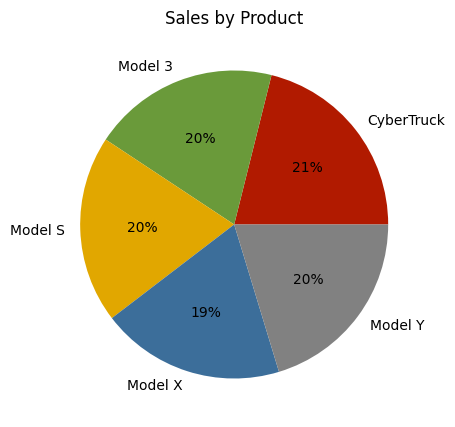

In [390]:
fig, axes = plt.subplots(figsize=(10, 5))
plt.pie(product_data['Transaction_ID'], labels=product_data['Product_Name'], colors=["#B11A00", "#6A9A3A", "#E1A700", "#3C6E9A","#818181"], autopct='%.0f%%')
axes.set_title("Sales by Product")
plt.show()

In [391]:
sales_data["YearMonthN"] = pd.to_datetime(sales_data["Date"]).dt.strftime("%Y-%m")  # Format as YYYY-MM
monthly_sales_yoy = sales_data.groupby(['Year', 'Month','YearMonthN'])['Total_Revenue'].sum().reset_index()

# Create a Year-Month column
monthly_sales_yoy["YearMonth"] = monthly_sales_yoy["Year"].astype(str) + "-" + monthly_sales_yoy["Month"].astype(str)
# Compute last year's sales for the same month
monthly_sales_yoy["Last_Year_Sales"] = monthly_sales_yoy["Total_Revenue"].shift(12)
monthly_sales_yoy["Last_Month_Sales"] = monthly_sales_yoy["Total_Revenue"].shift(1)

# Compute YoY Growth %
monthly_sales_yoy["YoY_Growth"] = ((monthly_sales_yoy["Total_Revenue"] - monthly_sales_yoy["Last_Year_Sales"]) /
                               monthly_sales_yoy["Last_Year_Sales"]) * 100

# Compute MoM Growth %
monthly_sales_yoy["MoM_Growth"] = ((monthly_sales_yoy["Total_Revenue"] - monthly_sales_yoy["Last_Month_Sales"]) /
                               monthly_sales_yoy["Last_Month_Sales"]) * 100

monthly_sales_yoy = monthly_sales_yoy.sort_values(by='YearMonthN',ascending=True)

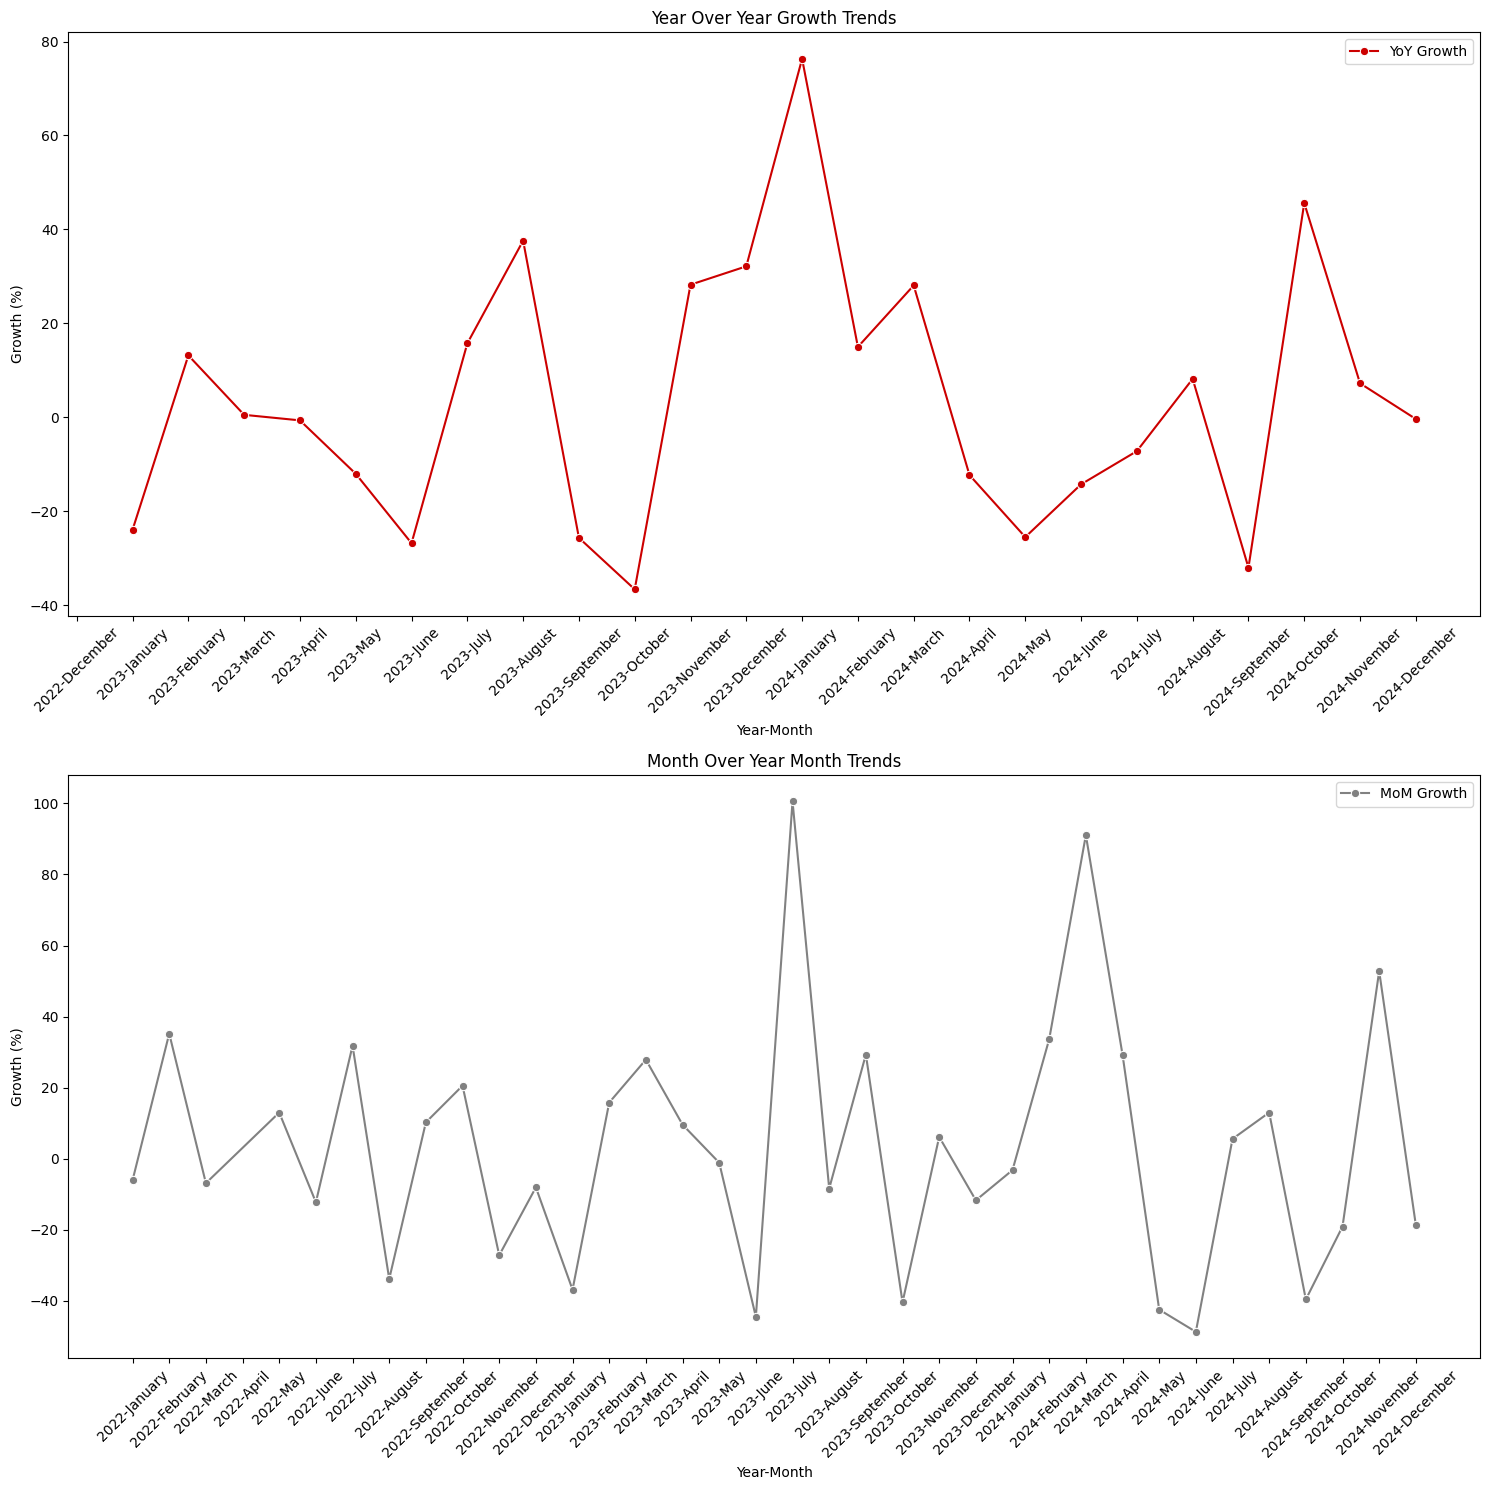

In [392]:
fig, axes = plt.subplots(2, 1, figsize=(15, 15))
# Monthly Sales Trend
sns.lineplot(data=monthly_sales_yoy, x="YearMonth",ax=axes[0], y="YoY_Growth", marker="o", label="YoY Growth",color = "#cc0000")
axes[0].set_title("Year Over Year Growth Trends")
axes[0].set_ylabel("Growth (%)")
axes[0].set_xlabel("Year-Month")
axes[0].tick_params(axis='x', rotation=45)


# Quarterly Sales Trend
sns.lineplot(data=monthly_sales_yoy, x="YearMonth", y="MoM_Growth", ax=axes[1],marker="o", label="MoM Growth",color = "#818181")
axes[1].set_title("Month Over Year Month Trends")
axes[1].set_ylabel("Growth (%)")
axes[1].set_xlabel("Year-Month")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


### **YoY Growth %: Meaning**
*   +20% or more	: Strong growth year-over-year
*   0% to +10%	: Steady, but slow growth
*   Negative (-)	: Decline in business performance



##4. Customer Behaviour Analysis

In [393]:
customer_data = sales_data.groupby(by='Customer_Type')['Transaction_ID'].count().reset_index()

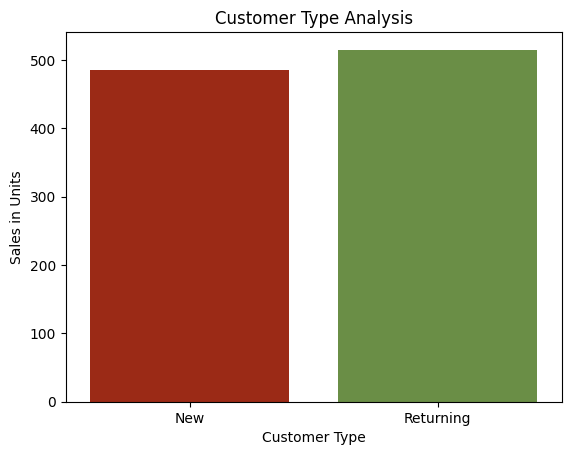

In [394]:
sns.barplot(x='Customer_Type',y='Transaction_ID',hue='Customer_Type',data=customer_data,palette = ["#B11A00", "#6A9A3A"])
plt.xlabel('Customer Type')
plt.ylabel('Sales in Units')
plt.title('Customer Type Analysis')
plt.show()

In [395]:
purchase_data = sales_data.groupby(by='Purchase_Method')['Transaction_ID'].count().reset_index()

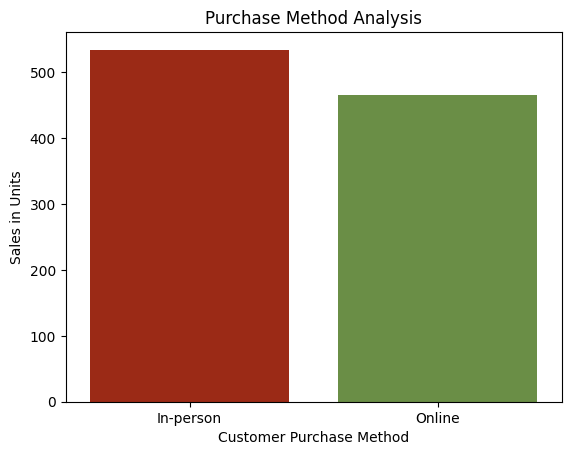

In [396]:
sns.barplot(x='Purchase_Method',y='Transaction_ID',hue='Purchase_Method',data=purchase_data,palette = ["#B11A00", "#6A9A3A"])
plt.xlabel('Customer Purchase Method')
plt.ylabel('Sales in Units')
plt.title('Purchase Method Analysis')
plt.show()

In [397]:
payment_data = sales_data.groupby(by='Payment_Type')['Transaction_ID'].count().reset_index()
payment_data

,Payment_Type,Transaction_ID
0,Cash,245
1,Credit Card,240
2,Financing,248
3,Lease,267


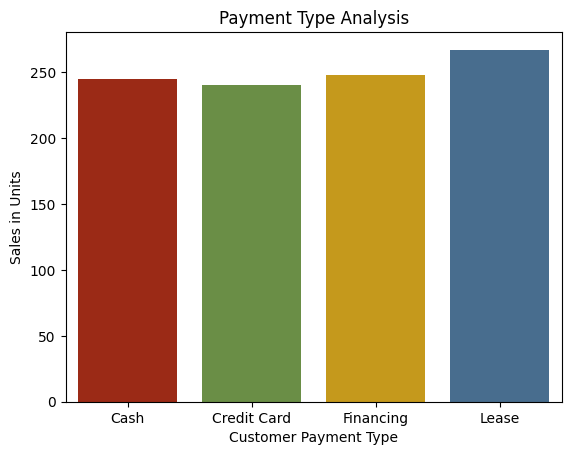

In [398]:
sns.barplot(x='Payment_Type',y='Transaction_ID',hue='Payment_Type',data=payment_data,palette=["#B11A00", "#6A9A3A", "#E1A700", "#3C6E9A"])
plt.xlabel('Customer Payment Type')
plt.ylabel('Sales in Units')
plt.title('Payment Type Analysis')
plt.show()

In [399]:
payment_data = sales_data.groupby(by=['Payment_Type','Year'])['Transaction_ID'].count().reset_index()

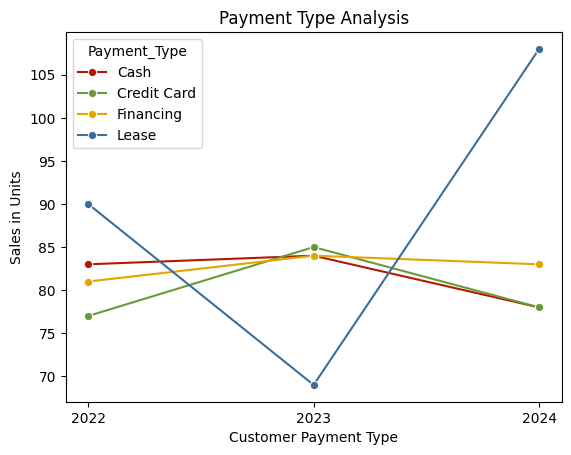

In [400]:
sns.lineplot(x='Year', y='Transaction_ID', data=payment_data,hue='Payment_Type',marker="o",palette=["#B11A00", "#6A9A3A", "#E1A700", "#3C6E9A"])
plt.xlabel('Customer Payment Type')
plt.ylabel('Sales in Units')
plt.title('Payment Type Analysis')
plt.xticks([2022,2023,2024])
plt.show()

## Conclusion:
-  Sales have been constant since 2022.
-  Sales have increased during July month of every year.
-  Sales have dropped in Q4 of every year. We can focus on analysing more on why the sales are dropping in last quarter of every year.
-  Product /Customer Analysis doesnt not have significant insights.
-  However, I see the lease sales have increased in 2024.